In [32]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import time  
from sklearn.cluster import OPTICS
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split

In [33]:
def clean_dataset(df,lb):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return (df[indices_to_keep].astype(np.float64)),lb[indices_to_keep]

In [34]:
directory = '/home/quaresma/Documentos/TCC/ANTS/TesteDBScan/'
attack_df = {}

attack_df[0] = pd.read_csv(directory+'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
#attack_df[1]= pd.read_csv(directory+'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
#attack_df[2] = pd.read_csv(directory+'Friday-WorkingHours-Morning.pcap_ISCX.csv')
#attack_df[3] = pd.read_csv(directory+'Monday-WorkingHours.pcap_ISCX.csv')
#attack_df[4] = pd.read_csv(directory+'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
#attack_df[5] = pd.read_csv(directory+'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
#attack_df[6] = pd.read_csv(directory+'Tuesday-WorkingHours.pcap_ISCX.csv')
#attack_df[7] = pd.read_csv(directory+'Wednesday-workingHours.pcap_ISCX.csv')

attack_df = pd.concat(attack_df)

print(attack_df.shape)
attack_df.fillna(method = 'ffill', inplace=True)
print(attack_df.shape)

(225745, 79)
(225745, 79)


In [35]:
label = attack_df[' Label']
attack_df = attack_df.drop(' Label', axis = 1)
print(attack_df.shape)
print(label.shape)
attack_df,label = clean_dataset(attack_df,label)
print(attack_df.shape)
print(label.shape)

(225745, 78)
(225745,)
(225711, 78)
(225711,)


In [36]:
attack_train, attack_test, label_train, label_test = train_test_split( attack_df, label, test_size=0.33, random_state=42)

In [37]:
print(attack_train.shape,attack_test.shape,label_train.shape,label_test.shape)

(151226, 78) (74485, 78) (151226,) (74485,)


In [38]:
print(set(label_train))

{'BENIGN', 'DDoS'}


In [39]:
scaler = StandardScaler()
attack_scaled = scaler.fit_transform(attack_train)

#normalizing data
attack_normalized = normalize(attack_scaled)

attack_normalized = pd.DataFrame(attack_normalized)

In [40]:
#reducing dimensionality
pca = PCA(n_components = 2)
attack_principal = pca.fit_transform(attack_normalized)
attack_principal = pd.DataFrame(attack_principal)
attack_principal.columns = ['P1','P2']
print(attack_principal.head())

         P1        P2
0 -0.440882 -0.330411
1  0.224406  0.957506
2  0.980235 -0.179512
3 -0.531884 -0.385080
4  0.921107 -0.315713


In [41]:
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime())

'2021-09-22 11:01:42'

In [ ]:
#building clustering model
optics_dbscan_attack = OPTICS(max_eps = 3, min_samples = 100).fit(attack_principal)

In [ ]:
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime())

In [18]:
labels = optics_dbscan_attack.labels_

In [ ]:
print(labels.shape)

In [25]:
#visualizing
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'c'
colours[4] = 'm'
colours[5] = 'y'
colours[6] = 'w'
colours[-1] = 'k'

cvec = [colours[label1] for label1 in labels]

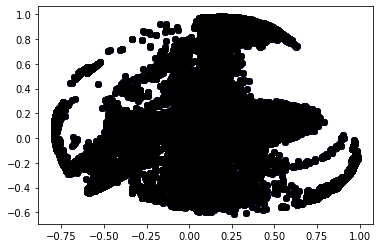

In [22]:
r = plt.scatter(attack_principal['P1'], attack_principal['P2'], color ='r')
g = plt.scatter(attack_principal['P1'], attack_principal['P2'], color ='g')
b = plt.scatter(attack_principal['P1'], attack_principal['P2'], color ='w')
c = plt.scatter(attack_principal['P1'], attack_principal['P2'], color ='c')
m = plt.scatter(attack_principal['P1'], attack_principal['P2'], color ='m')
y = plt.scatter(attack_principal['P1'], attack_principal['P2'], color ='y')
w = plt.scatter(attack_principal['P1'], attack_principal['P2'], color ='b')
k = plt.scatter(attack_principal['P1'], attack_principal['P2'], color ='k')

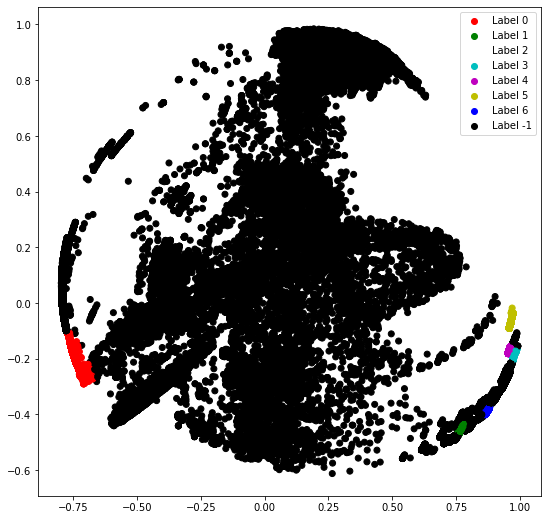

In [26]:
plt.figure(figsize =(9, 9))
plt.scatter(attack_principal['P1'], attack_principal['P2'], c = cvec)

plt.legend((r, g, b, c, m, y, w, k), ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5' , 'Label 6' , 'Label -1'))
  
plt.show()